**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Problem Objective :**

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**Analysis Tasks to be performed:**

1. Import the three datasets.

2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId).

3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

    i). User Age Distribution.

    ii). User rating of the movie “Toy Story”.

    iii). Top 25 movies by viewership rating.

    iv). Find the ratings for all the movies reviewed by for a particular user of user  id = 2696.
    

4. Feature Engineering:

    **Use column genres:**

    i). Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres).
    
    ii). Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
    
    iii). Determine the features affecting the ratings of any particular movie.
    
    iv).Develop an appropriate model to predict the movie ratings Dataset Description :

***These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.***

In [2]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Import the dataset.**

In [16]:
data_1 = pd.read_csv('movies.csv', engine = 'python', sep = '::', encoding = 'latin-1'
                    ,header = None)
data_1.columns = ['Movie_ID', 'Title', 'Genres']
print(data_1.shape)
data_1.head()

(3883, 3)


,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
data_1.describe()

,Movie_ID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [24]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [18]:
data_2 = pd.read_csv('users.csv', engine = 'python', sep = '::', encoding = 'latin-1',
                    header = None)
data_2.columns = ['User_ID','Gender','Age','Occupation','Zip_Code']
print(data_2.shape)
data_2.head()

(6040, 5)


,User_ID,Gender,Age,Occupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [22]:
data_2.describe()

,User_ID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [25]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip_Code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [55]:
data_3 = pd.read_csv('ratings.csv', engine = 'python', sep = '::', encoding = 'latin-1',
                    header = None)
data_3.columns = ['User_ID','Movie_ID','Ratings','Timestamp']
print(data_3.shape)
data_3.head()

(1000209, 4)


,User_ID,Movie_ID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
data_3.describe()

,User_ID,Movie_ID,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [57]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   User_ID    1000209 non-null  int64
 1   Movie_ID   1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


**2. Create a Master Data**

In [58]:
data_4 = pd.merge(data_1,data_3, left_on = 'Movie_ID',right_on = 'Movie_ID', how = 'inner')
data_4.head()

,Movie_ID,Title,Genres,User_ID,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [59]:
data = pd.merge(data_4,data_2, left_on = 'User_ID',right_on = 'User_ID', how = 'inner')
data.head()

,Movie_ID,Title,Genres,User_ID,Ratings,Timestamp,Gender,Age,Occupation,Zip_Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [60]:
print(data.shape)
#print(data.describe)
data.info()

(1000209, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Movie_ID    1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   User_ID     1000209 non-null  int64 
 4   Ratings     1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip_Code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


**#3 -i). User Age Distribution**

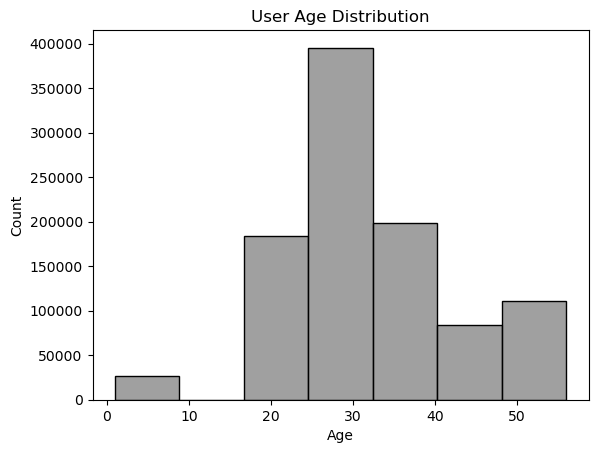

In [61]:
#1.User Age Distribution
sns.histplot(data = data['Age'], bins = 7, color = 'grey')
plt.title('User Age Distribution')
plt.show()

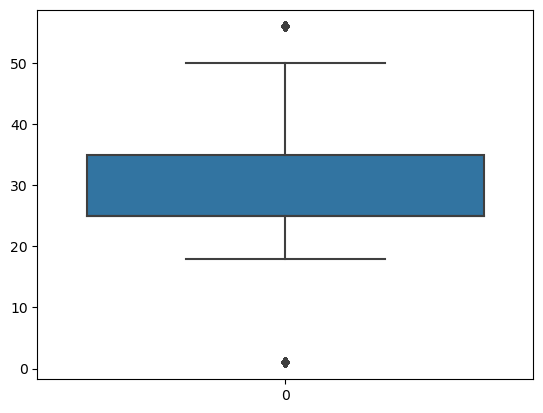

In [62]:
sns.boxplot(data = data['Age'])
plt.show()

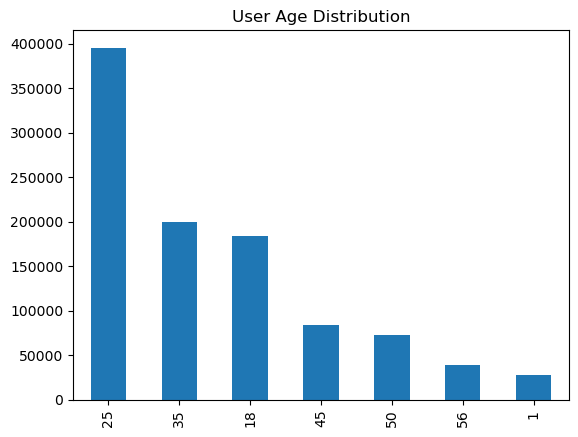

In [63]:
(data['Age'].value_counts()).plot(kind = 'bar')
plt.title('User Age Distribution')
plt.show()

**3 - ii). User rating of the movie “Toy Story”**

In [77]:
#User rating of the movie “Toy Story”
movie_list = data.groupby('Title')[['Ratings']].mean()

In [80]:
movie_list = movie_list.reset_index()

In [85]:
print(movie_list[movie_list['Title'] == 'Toy Story 2 (1999)'])
print("\n")
print(movie_list[movie_list['Title'] == 'Toy Story (1995)'])

                   Title   Ratings
3412  Toy Story 2 (1999)  4.218927


                 Title   Ratings
3411  Toy Story (1995)  4.146846


**3 - iii). Top 25 movies by viewership rating.**

In [87]:
#3.Top 25 movies by viewership rating.
top_25 = movie_list.sort_values('Ratings', ascending = False).head(25)
top_25 = top_25.reset_index(drop = True)
top_25

,Title,Ratings
0,Ulysses (Ulisse) (1954),5.000000
1,Lured (1947),5.000000
2,Follow the Bitch (1998),5.000000
3,Bittersweet Motel (2000),5.000000
4,Song of Freedom (1936),5.000000
5,One Little Indian (1973),5.000000
6,Smashing Time (1967),5.000000
7,Schlafes Bruder (Brother of Sleep) (1995),5.000000
8,"Gate of Heavenly Peace, The (1995)",5.000000
9,"Baby, The (1973)",5.000000


**3 - iv). Find the ratings for all the movies reviewed by for a particular user of user id = 2696.**

In [93]:
user_2696 = data[data['User_ID'] == 2696]
movie_list_2696 = user_2696.groupby('Title')[['Ratings']].mean()
movie_list_2696 = movie_list_2696.reset_index()
print(movie_list_2696.shape)
movie_list_2696

(20, 2)


,Title,Ratings
0,Back to the Future (1985),2.0
1,Basic Instinct (1992),4.0
2,"Client, The (1994)",3.0
3,Cop Land (1997),3.0
4,"Devil's Advocate, The (1997)",4.0
5,E.T. the Extra-Terrestrial (1982),3.0
6,"Game, The (1997)",4.0
7,I Know What You Did Last Summer (1997),2.0
8,I Still Know What You Did Last Summer (1998),2.0
9,JFK (1991),1.0


In [ ]:
#Use column genres:
#1.Find out all the unique genres